

**Task 1: Exploratory Data Analysis (EDA) and Business Insights**


In [43]:
# Import required libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Set visualization style
sns.set(style="whitegrid")

# Load the datasets
customers_df = pd.read_csv("/content/Customers.csv")
products_df = pd.read_csv("/content/Products.csv")
transactions_df = pd.read_csv("/content/Transactions.csv")




In [44]:
# Display the first few rows of each dataset
print("Customers Data:")
display(customers_df.head())

print("Products Data:")
display(products_df.head())

print("Transactions Data:")
display(transactions_df.head())

Customers Data:


,CustomerID,CustomerName,Region,SignupDate
0,C0001,Lawrence Carroll,South America,2022-07-10
1,C0002,Elizabeth Lutz,Asia,2022-02-13
2,C0003,Michael Rivera,South America,2024-03-07
3,C0004,Kathleen Rodriguez,South America,2022-10-09
4,C0005,Laura Weber,Asia,2022-08-15


Products Data:


,ProductID,ProductName,Category,Price
0,P001,ActiveWear Biography,Books,169.30
1,P002,ActiveWear Smartwatch,Electronics,346.30
2,P003,ComfortLiving Biography,Books,44.12
3,P004,BookWorld Rug,Home Decor,95.69
4,P005,TechPro T-Shirt,Clothing,429.31


Transactions Data:


,TransactionID,CustomerID,ProductID,TransactionDate,Quantity,TotalValue,Price
0,T00001,C0199,P067,2024-08-25 12:38:23,1,300.68,300.68
1,T00112,C0146,P067,2024-05-27 22:23:54,1,300.68,300.68
2,T00166,C0127,P067,2024-04-25 07:38:55,1,300.68,300.68
3,T00272,C0087,P067,2024-03-26 22:55:37,2,601.36,300.68
4,T00363,C0070,P067,2024-03-21 15:10:10,3,902.04,300.68


In [45]:
# Summary statistics for each dataset
print("\nSummary Statistics for Customers:")
display(customers_df.describe(include="all"))

print("\nSummary Statistics for Products:")
display(products_df.describe(include="all"))

print("\nSummary Statistics for Transactions:")
display(transactions_df.describe(include="all"))


Summary Statistics for Customers:


,CustomerID,CustomerName,Region,SignupDate
count,200,200,200,200
unique,200,200,4,179
top,C0001,Lawrence Carroll,South America,2024-11-11
freq,1,1,59,3



Summary Statistics for Products:


,ProductID,ProductName,Category,Price
count,100,100,100,100.000000
unique,100,66,4,NaN
top,P001,ActiveWear Smartwatch,Books,NaN
freq,1,4,26,NaN
mean,NaN,NaN,NaN,267.551700
std,NaN,NaN,NaN,143.219383
min,NaN,NaN,NaN,16.080000
25%,NaN,NaN,NaN,147.767500
50%,NaN,NaN,NaN,292.875000
75%,NaN,NaN,NaN,397.090000



Summary Statistics for Transactions:


,TransactionID,CustomerID,ProductID,TransactionDate,Quantity,TotalValue,Price
count,1000,1000,1000,1000,1000.000000,1000.000000,1000.00000
unique,1000,199,100,1000,NaN,NaN,NaN
top,T00001,C0109,P059,2024-08-25 12:38:23,NaN,NaN,NaN
freq,1,11,19,1,NaN,NaN,NaN
mean,NaN,NaN,NaN,NaN,2.537000,689.995560,272.55407
std,NaN,NaN,NaN,NaN,1.117981,493.144478,140.73639
min,NaN,NaN,NaN,NaN,1.000000,16.080000,16.08000
25%,NaN,NaN,NaN,NaN,2.000000,295.295000,147.95000
50%,NaN,NaN,NaN,NaN,3.000000,588.880000,299.93000
75%,NaN,NaN,NaN,NaN,4.000000,1011.660000,404.40000


**Checking for Missing Values**

In [46]:
# Check for missing values
print("\nMissing Values in Customers:")
print(customers_df.isnull().sum())

print("\nMissing Values in Products:")
print(products_df.isnull().sum())

print("\nMissing Values in Transactions:")
print(transactions_df.isnull().sum())


Missing Values in Customers:
CustomerID      0
CustomerName    0
Region          0
SignupDate      0
dtype: int64

Missing Values in Products:
ProductID      0
ProductName    0
Category       0
Price          0
dtype: int64

Missing Values in Transactions:
TransactionID      0
CustomerID         0
ProductID          0
TransactionDate    0
Quantity           0
TotalValue         0
Price              0
dtype: int64


**Merging the datasets for Enriched Anlysis of the data**

In [47]:
# Merge datasets for enriched analysis
transactions_enriched = transactions_df.merge(customers_df, on="CustomerID", how="left").merge(products_df, on="ProductID", how="left")

# Display enriched transactions data
print("\nEnriched Transactions Data:")
display(transactions_enriched.head())


Enriched Transactions Data:


,TransactionID,CustomerID,ProductID,TransactionDate,Quantity,TotalValue,Price_x,CustomerName,Region,SignupDate,ProductName,Category,Price_y
0,T00001,C0199,P067,2024-08-25 12:38:23,1,300.68,300.68,Andrea Jenkins,Europe,2022-12-03,ComfortLiving Bluetooth Speaker,Electronics,300.68
1,T00112,C0146,P067,2024-05-27 22:23:54,1,300.68,300.68,Brittany Harvey,Asia,2024-09-04,ComfortLiving Bluetooth Speaker,Electronics,300.68
2,T00166,C0127,P067,2024-04-25 07:38:55,1,300.68,300.68,Kathryn Stevens,Europe,2024-04-04,ComfortLiving Bluetooth Speaker,Electronics,300.68
3,T00272,C0087,P067,2024-03-26 22:55:37,2,601.36,300.68,Travis Campbell,South America,2024-04-11,ComfortLiving Bluetooth Speaker,Electronics,300.68
4,T00363,C0070,P067,2024-03-21 15:10:10,3,902.04,300.68,Timothy Perez,Europe,2022-03-15,ComfortLiving Bluetooth Speaker,Electronics,300.68


**Top 5 Observations from the datasets**


Total Sales by Region:
Region
South America    219352.56
Europe           166254.63
North America    152313.40
Asia             152074.97
Name: TotalValue, dtype: float64


<ipython-input-48-08c60c3751f6>:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=region_sales.index, y=region_sales.values, palette="coolwarm")  # Changed color palette


(array([     0.,  50000., 100000., 150000., 200000., 250000.]),
 [Text(0, 0.0, '0'),
  Text(0, 50000.0, '50000'),
  Text(0, 100000.0, '100000'),
  Text(0, 150000.0, '150000'),
  Text(0, 200000.0, '200000'),
  Text(0, 250000.0, '250000')])

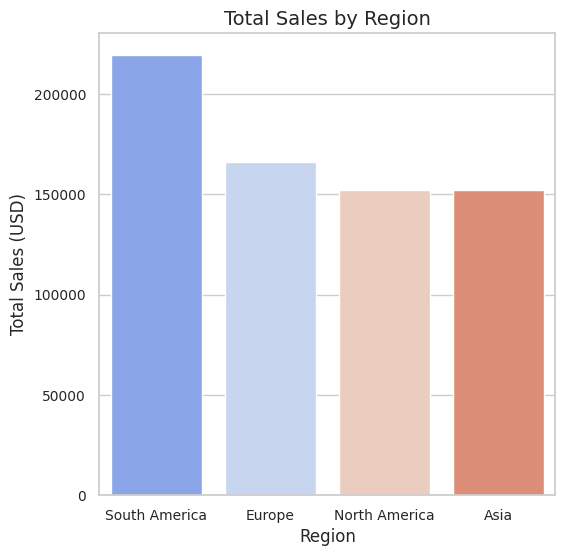

In [48]:
# Aggregation: Total sales per region
region_sales = transactions_enriched.groupby("Region")["TotalValue"].sum().sort_values(ascending=False)
print("\nTotal Sales by Region:")
print(region_sales)

# Visualizations
plt.figure(figsize=(20, 6))  # Increased figure size for better readability

# Region-wise sales
plt.subplot(1, 3, 1)
sns.barplot(x=region_sales.index, y=region_sales.values, palette="coolwarm")  # Changed color palette
plt.title("Total Sales by Region", fontsize=14)
plt.ylabel("Total Sales (USD)", fontsize=12)
plt.xlabel("Region", fontsize=12)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)


Percentage of Repeat Customers: 93.97%
Contribution of Top 10% Customers: 17.10%


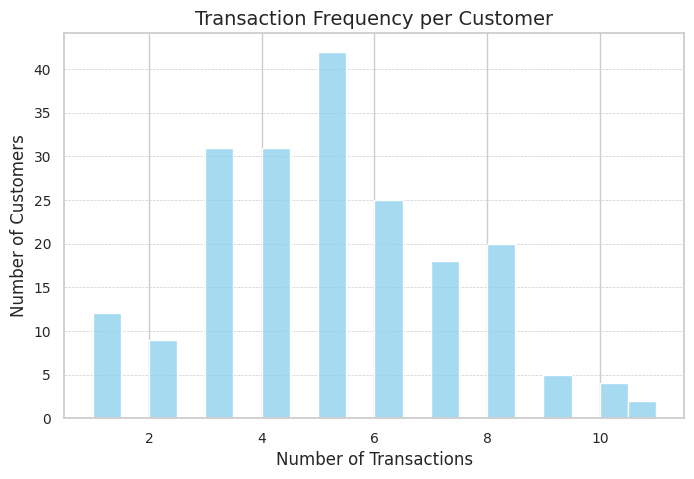

<Figure size 640x480 with 0 Axes>

In [49]:
# Aggregation: Count transactions per customer
customer_transaction_counts = transactions_df.groupby("CustomerID")["TransactionID"].count()

# Percentage of repeat customers
repeat_customers_percentage = (customer_transaction_counts[customer_transaction_counts > 1].count() / customer_transaction_counts.count()) * 100
print(f"\nPercentage of Repeat Customers: {repeat_customers_percentage:.2f}%")

# Top 10% customers' contribution
top_10_percent_customers = int(0.1 * customer_transaction_counts.count())
top_customers_contribution = (customer_transaction_counts.nlargest(top_10_percent_customers).sum() / customer_transaction_counts.sum()) * 100
print(f"Contribution of Top 10% Customers: {top_customers_contribution:.2f}%")

# Visualization: Transaction frequency
plt.figure(figsize=(8, 5))
sns.histplot(customer_transaction_counts, bins=20, kde=False, color="skyblue")
plt.title("Transaction Frequency per Customer", fontsize=14)
plt.xlabel("Number of Transactions", fontsize=12)
plt.ylabel("Number of Customers", fontsize=12)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.grid(axis="y", linestyle="--", linewidth=0.5)
plt.show()
# Adjust layout
plt.tight_layout()
plt.show()


Top 5 Products by Sales:
ProductName
ActiveWear Smartwatch    39096.97
SoundWave Headphones     25211.64
SoundWave Novel          24507.90
ActiveWear Jacket        22712.56
ActiveWear Rug           22314.43
Name: TotalValue, dtype: float64


<ipython-input-50-fd72ffbab0e5>:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(y=top_products.index, x=top_products.values, palette="crest")  # Changed color palette


([0, 1, 2, 3, 4],
 [Text(0, 0, 'ActiveWear Smartwatch'),
  Text(0, 1, 'SoundWave Headphones'),
  Text(0, 2, 'SoundWave Novel'),
  Text(0, 3, 'ActiveWear Jacket'),
  Text(0, 4, 'ActiveWear Rug')])

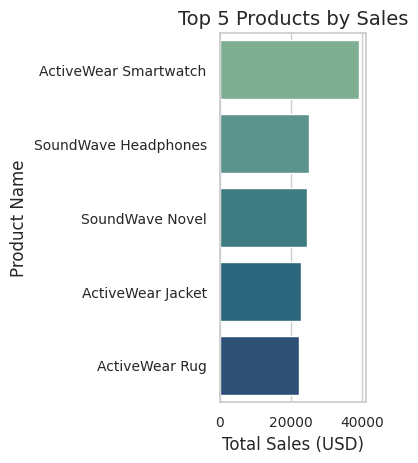

In [50]:
# Aggregation: Top 5 products by sales
top_products = transactions_enriched.groupby("ProductName")["TotalValue"].sum().nlargest(5)
print("\nTop 5 Products by Sales:")
print(top_products)

#Visualization of Top 5 products by sales
plt.subplot(1, 3, 2)
sns.barplot(y=top_products.index, x=top_products.values, palette="crest")  # Changed color palette
plt.title("Top 5 Products by Sales", fontsize=14)
plt.xlabel("Total Sales (USD)", fontsize=12)
plt.ylabel("Product Name", fontsize=12)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)


Total Sales by Category:
Category
Books          192147.47
Electronics    180783.50
Clothing       166170.66
Home Decor     150893.93
Name: TotalValue, dtype: float64


<ipython-input-51-c21d082fc42f>:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=category_sales.index, y=category_sales.values, palette="plasma")


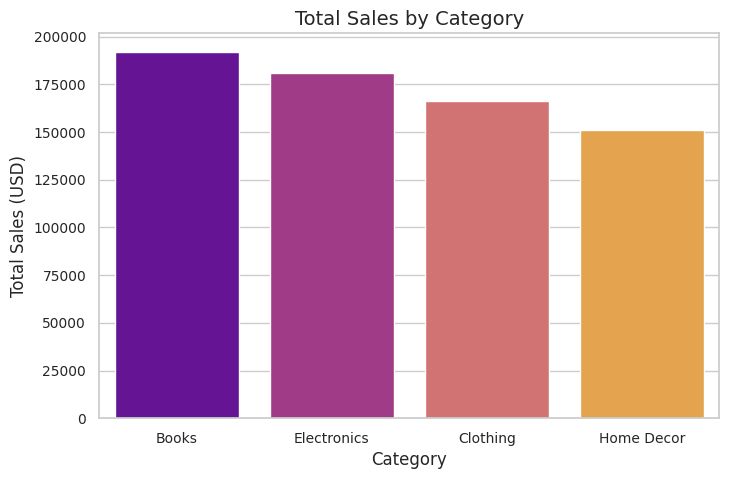

In [51]:
# Aggregation: Total sales by category
category_sales = transactions_enriched.groupby("Category")["TotalValue"].sum().sort_values(ascending=False)
print("\nTotal Sales by Category:")
print(category_sales)

#Visualization of Total sales by category
plt.figure(figsize=(8, 5))
sns.barplot(x=category_sales.index, y=category_sales.values, palette="plasma")
plt.title("Total Sales by Category", fontsize=14)
plt.ylabel("Total Sales (USD)", fontsize=12)
plt.xlabel("Category", fontsize=12)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.show()




Monthly Sales Trend:
TransactionMonth
2023-12     3769.52
2024-01    66376.39
2024-02    51459.27
2024-03    47828.73
2024-04    57519.06
2024-05    64527.74
2024-06    48771.18
2024-07    71366.39
2024-08    63436.74
2024-09    70603.75
2024-10    47063.22
2024-11    38224.37
2024-12    59049.20
Freq: M, Name: TotalValue, dtype: float64


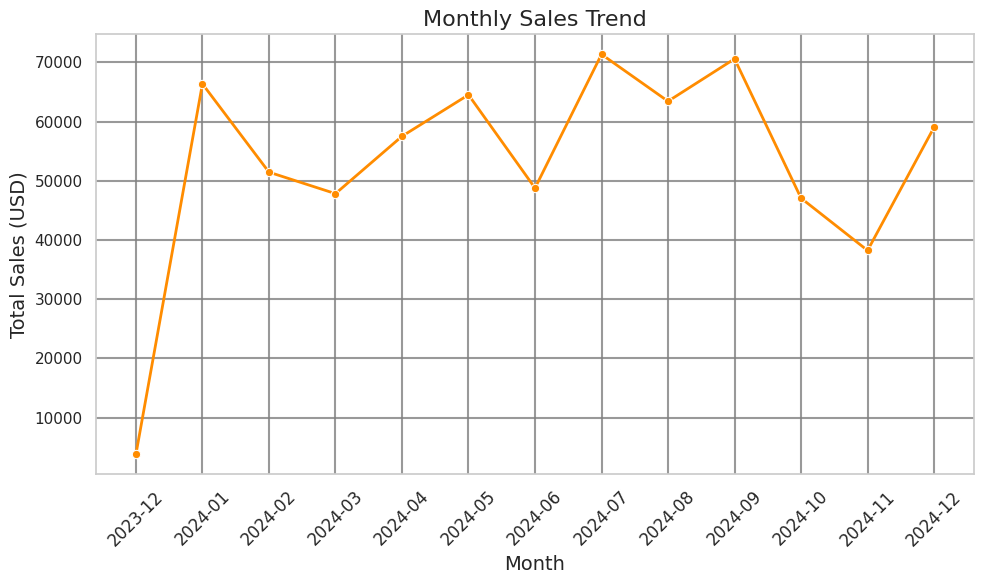

In [52]:

# Aggregation: Monthly transaction trends
transactions_enriched["TransactionMonth"] = pd.to_datetime(transactions_enriched["TransactionDate"]).dt.to_period("M")
monthly_sales = transactions_enriched.groupby("TransactionMonth")["TotalValue"].sum()
print("\nMonthly Sales Trend:")
print(monthly_sales)

#Visualization of Monthly sales trend
plt.figure(figsize=(10, 6))  # Increased figure size
monthly_sales.index = monthly_sales.index.astype(str)
sns.lineplot(x=monthly_sales.index, y=monthly_sales.values, marker="o", color="darkorange", linewidth=2)
plt.title("Monthly Sales Trend", fontsize=16)
plt.xticks(rotation=45, fontsize=12)
plt.ylabel("Total Sales (USD)", fontsize=14)
plt.xlabel("Month", fontsize=14)
plt.grid(color="gray", linestyle="-", linewidth=1.5, alpha=0.8)
plt.tight_layout()
plt.show()
